<a href="https://colab.research.google.com/github/chyoungseok/Automatic_Sleep_Staging_and_Validation/blob/master/read_edf_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU and RAM setting

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 27 20:31:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install required modules

In [ ]:
!pip install yasa

     |████████████████████████████████| 33.8 MB 1.4 MB/s 
     |████████████████████████████████| 7.5 MB 22.2 MB/s 
     |████████████████████████████████| 423 kB 40.3 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
  Created wheel for yasa: filename=yasa-0.6.1-py3-none-any.whl size=33783338 sha256=7a219f851b218640c23569e8340e7eb1398fbbac8e317725e17ca7110c63c868
  Stored in directory: /root/.cache/pip/wheels/8c/fd/0a/0aca5a55a3102bc68c1b82bc7b2b9fb02607a58b7ae8b89a3a
  Created wheel for pyriemann: filename=pyriemann-0.2.7-py2.py3-none-any.whl size=49770 sha256=c50c4c94177e6a345d89f932e75d1cb1e4f5592a506f7dccbc82d96fe01c9846
  Stored in directory: /root/.cache/pip/wheels/5c/b7/55/27dcb08ed8fb58da8c1be108c23928ffb9125c9c1da2ddfb53
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=f9f18005753d7441a7ac3c4d29b9f82e892d4ea875774fb9e8a9e41d54417bfa
  Stored in directory: /root/.cache/pip

In [2]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np

# LEE004

In [ ]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [1]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE004 박규희']


In [ ]:
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 


 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE004 박규희/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE004 박규희/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-11-00aa6a652191>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'R-Leg', 'LOC', 'L-Leg', 'EKG', 'SO', 'ROC', 'Chin'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-11-00aa6a652191>:5: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin-0, Chin-1, L-Leg-0, L-Leg-1, EKG-0, EKG-1, R-Leg-0, R-Leg-1, SO-0, SO-1, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C4, A2, O1, O2, IO, F3, F4, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Reading 0 ... 11347999  =      0.000 ... 22695.998 secs...


In [ ]:
temp_raw.filter(0.5, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)



<RawEDF | Traces.edf, 51 x 11348000 (22696.0 s), ~4.31 GB, data loaded>

In [ ]:
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names

In [ ]:
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin-0', 'Chin-1', 'L-Leg-0', 'L-Leg-1', 'EKG-0', 'EKG-1', 'R-Leg-0', 'R-Leg-1', 'SO-0', 'SO-1', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C4', 'A2', 'O1', 'O2', 'IO', 'F3', 'F4', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO2-Quality_DR', 'Flow_DR', 'Snore_DR', 'Activity_DR', 'Elevation_DR', 'Position_DR', 'Phase_DR', 'RMI_DR', 'RR_DR', 'XSum_DR', 'Tidal Volume_DR', 'XFlow_DR']
Sampling frequency = 500.0 Hz
Data shape = (51, 11348000)


In [ ]:
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]

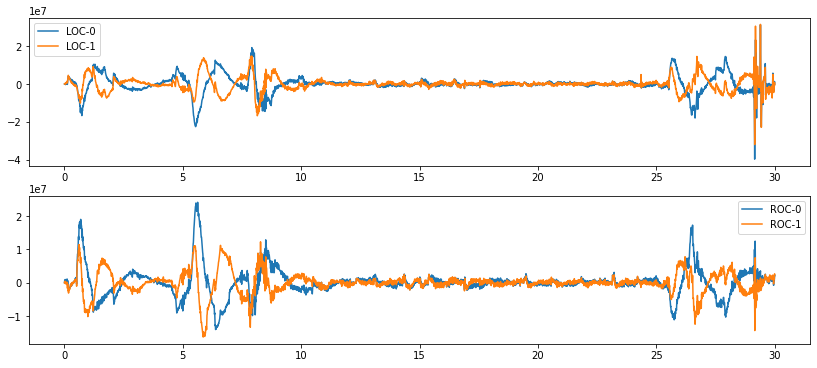

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

1. LOC-0과 ROC-0는 정반대의 phase를 보임

2. LOC-1과 ROC-1은 정반대의 phase를 보임

# LEE010

In [ ]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [4]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE010 신지윤']


In [ ]:
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 


 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE010 신지윤/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE010 신지윤/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11184999  =      0.000 ... 22369.998 secs...


<ipython-input-29-00aa6a652191>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-29-00aa6a652191>:5: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


In [ ]:
temp_raw.filter(0.5, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)



<RawEDF | Traces.edf, 52 x 11185000 (22370.0 s), ~4.33 GB, data loaded>

In [ ]:
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names

In [ ]:
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO2-Quality_DR', 'Flow_DR', 'Snore_DR', 'Activity_DR', 'Elevation_DR', 'Position_DR', 'Phase_DR', 'RMI_DR', 'RR_DR', 'XSum_DR', 'Tidal Volume_DR', 'XFlow_DR']
Sampling frequency = 500.0 Hz
Data shape = (52, 11185000)


In [ ]:
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]

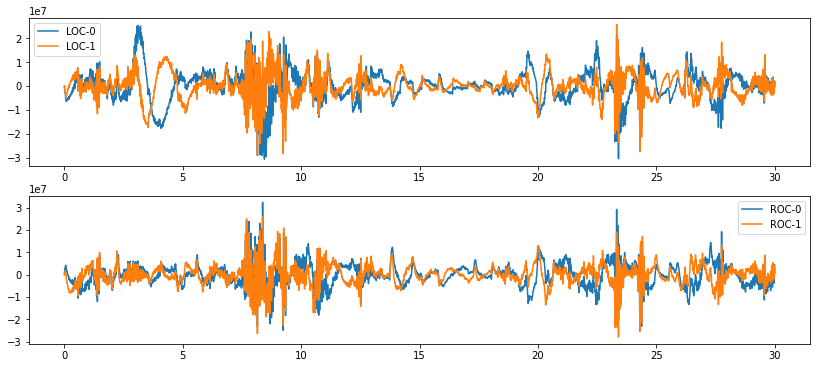

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE011

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE011 서영진']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE011 서영진/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE011 서영진/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-13cbca954f2c>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'SO', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-3-13cbca954f2c>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO-0, SO-1, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, Down-A2, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Reading 0 ... 11113999  =      0.000 ... 22227.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO-0', 'SO-1', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'Down-A2', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pul

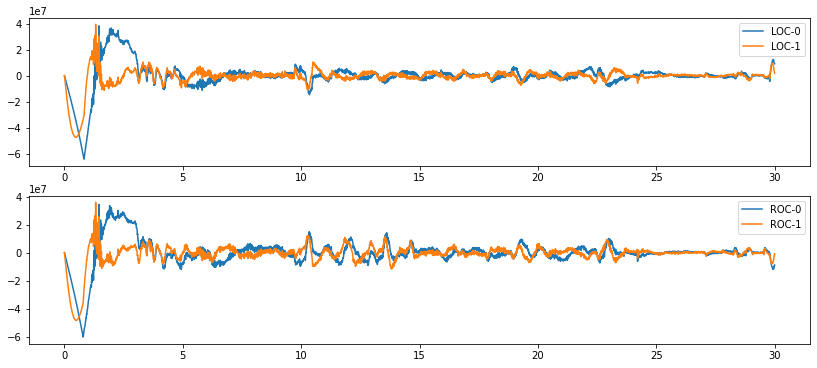

In [3]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [5]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE014

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE014 황지은']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE014 황지은/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE014 황지은/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 

<ipython-input-5-956c9bbdc21b>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'R-Leg', 'LOC', 'Chin', 'ROC', 'SO', 'L-Leg'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-5-956c9bbdc21b>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin-0, Chin-1, L-Leg-0, L-Leg-1, EKG, R-Leg-0, R-Leg-1, SO-0, SO-1, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, Down-A2, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin-0', 'Chin-1', 'L-Leg-0', 'L-Leg-1', 'EKG', 'R-Leg-0', 'R-Leg-1', 'SO-0', 'SO-1', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'Down-A2', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'S

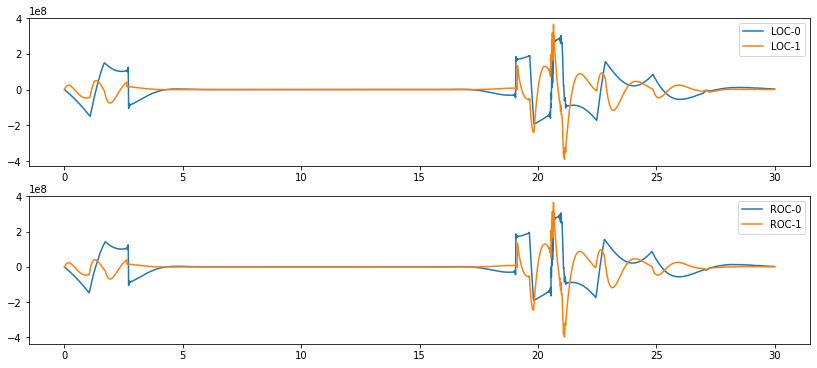

In [5]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [6]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE019

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE019 황주민']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE019 황주민/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE019 황주민/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 

<ipython-input-6-9232b4472243>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-6-9232b4472243>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO2-Quality_DR', 'Flow_

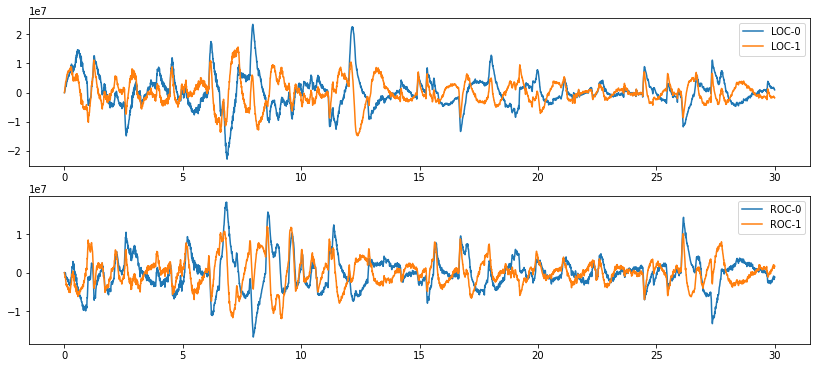

In [6]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [8]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE020

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE020 김세영']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE020 김세영/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE020 김세영/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 

<ipython-input-7-fd1cb1efd2c1>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'SO', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-7-fd1cb1efd2c1>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO-0, SO-1, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, Down-A2, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO-0', 'SO-1', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'Down-A2', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO

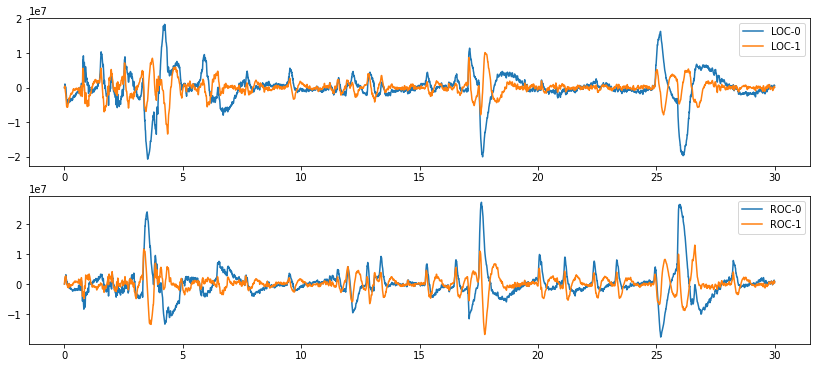

In [7]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [9]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE021

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE021 이지영']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE021 이지영/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE021 이지영/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 .

<ipython-input-8-10d8e5e74973>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-8-10d8e5e74973>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, Down-A2, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'Down-A2', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO2-Quality_

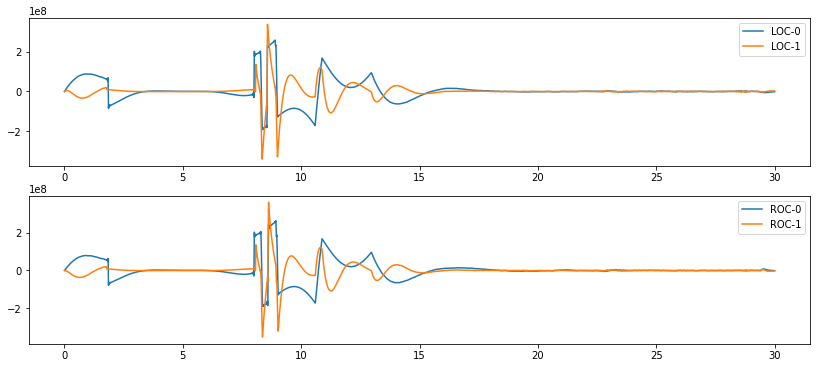

In [8]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [10]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE022


-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE022 양세희']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE022 양세희/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE022 양세희/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 .

<ipython-input-9-035952557973>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-9-035952557973>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO2-Quality_DR', 'Flow_

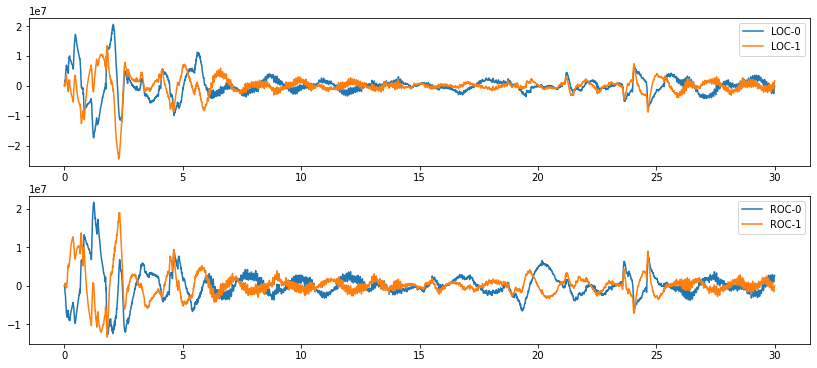

In [9]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [11]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

# LEE023

-- List of all subjects: 
 ['LE003 한정윤', 'LE004 박규희', 'LE005 김연경', 'LE009 김민지', 'LE010 신지윤', 'LE011 서영진', 'LE014 황지은', 'LE017 김연우', 'LE019 황주민', 'LE020 김세영', 'LE021 이지영', 'LE022 양세희', 'LE023 이해림', 'LE026 오정우', 'LE029 신정은', 'LE030 황지수', 'LE031 현선영', 'LE034 유호인', 'LGD001 신정은', 'LGD005 황지은', 'LGD008 서영진', 'LGD009 신지윤', 'LGD010 박소라', 'LGD011 박규희', 'LGD012 신규빈', 'LGD016 임설화', 'LGD018 임설미', 'LGD019 김보연', 'LGD021 서아현', 'LGD023 조아영', 'LGD024 원지윤']

-- List of chosen subjects: 
 ['LE023 이해림']

 Now file is ... 
 /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE023 이해림/Traces.edf
Extracting EDF parameters from /content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF/LE023 이해림/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 .

<ipython-input-10-bfaeb81905ad>:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'LOC', 'SO', 'ROC'}. Applying running numbers for duplicates.
  temp_raw = mne.io.read_raw_edf(file, preload=True)
<ipython-input-10-bfaeb81905ad>:20: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO-0, SO-1, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, Down-A2, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  temp_raw = mne.io.read_raw_edf(file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Chan = ['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO-0', 'SO-1', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'Down-A2', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO

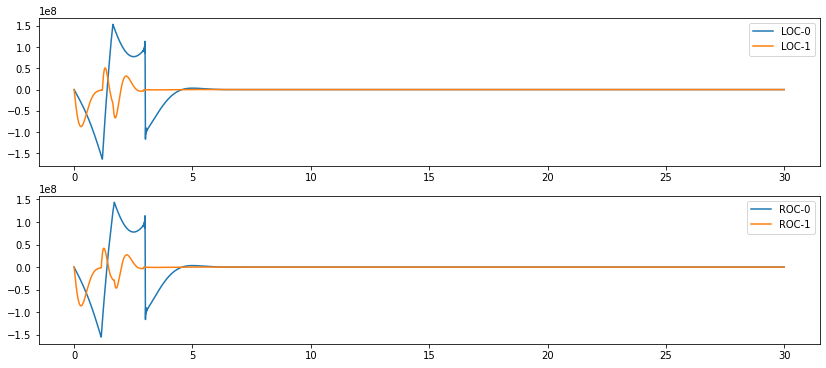

In [10]:
# define the path_subjects
# directory of the folders of each subjects, in which edf files locate
# path_subjects = 'D:\\USC\\Sleep dataset\\Samsung_data\\REGULAR_EDF' 
path_subjects = '/content/drive/Othercomputers/lenovo/USC/Sleep dataset/Samsung_data/REGULAR_EDF'

# find all subjects
subjects = os.listdir(path_subjects)
print('-- List of all subjects: \n',subjects)

# choose target subjects
choose_idx = [12]
subjects_chosen = []
for idx in choose_idx:
    subjects_chosen.append(subjects[idx])
print('\n-- List of chosen subjects: \n',subjects_chosen)
raw = []
for subject in subjects_chosen:
    file = os.path.join(path_subjects, subject, 'Traces.edf')
    print('\n Now file is ... \n',file)
    temp_raw = mne.io.read_raw_edf(file, preload=True) 
temp_raw.filter(0.5, 45)
data = temp_raw._data * 1e6
sf = temp_raw.info['sfreq']
chan = temp_raw.ch_names
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)
chan = np.array(chan)
idx = np.arange(len(chan))

t = np.arange(0,data.shape[1], 1)/500
LOC_0 = data[idx[chan=='LOC-0']]
LOC_1 = data[idx[chan=='LOC-1']]

ROC_0 = data[idx[chan=='ROC-0']]
ROC_1 = data[idx[chan=='ROC-1']]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*30], LOC_0[0][0:500*30], label='LOC-0')
ax1.plot(t[0:500*30], LOC_1[0][0:500*30], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*30], ROC_0[0][0:500*30], label='ROC-0')
ax2.plot(t[0:500*30], ROC_1[0][0:500*30], label='ROC-1')
ax2.legend();

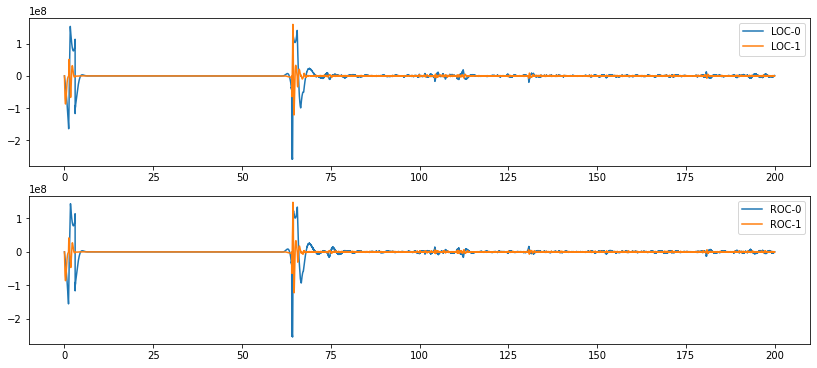

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,6))

ax1.plot(t[0:500*200], LOC_0[0][0:500*200], label='LOC-0')
ax1.plot(t[0:500*200], LOC_1[0][0:500*200], label='LOC-1')
ax1.legend();

ax2.plot(t[0:500*200], ROC_0[0][0:500*200], label='ROC-0')
ax2.plot(t[0:500*200], ROC_1[0][0:500*200], label='ROC-1')
ax2.legend();